In [29]:
import numpy as np
import matplotlib.pyplot as plt
import os
import yaml
import time
import MDAnalysis as mda

/home/ricky/anaconda3/envs/all3/lib/python3.8/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
/home/ricky/anaconda3/envs/all3/lib/python3.8/site-packages/MDAnalysis/coordinates/chemfiles.py:59: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  MIN_CHEMFILES_VERSION = LooseVersion("0.9")


<H3>Get minimum distances of any atom of SDS from any atom of peptide</H3>

In [5]:
folder_path="/media/ricky/Ricky2020/Corys_peptides/full_trajectories/"

In [58]:
selection="eYqjD_micelle_50SDS_CHARMM_310K_Na_Neut_OPC_replica1"
SDS_id_in_ndx_file=2
for j,file in enumerate(os.listdir(folder_path)):
    if (selection in file):
        path=folder_path+file+"/"

        readme=path+"README.yaml"
        with open(readme) as yaml_file:
            content = yaml.load(yaml_file, Loader=yaml.FullLoader)

        print(content["FILES_FOR_RELAXATION"]["xtc"]["NAME"])
        print(content["FILES_FOR_RELAXATION"]["tpr"]["NAME"])

        os.system("echo 'System'|gmx trjconv -f "+ path+content["FILES_FOR_RELAXATION"]["xtc"]["NAME"] + " -s "+path+content["FILES_FOR_RELAXATION"]["tpr"]["NAME"] + " -dump 0 -o "+file+".gro -pbc nojump")
        os.system("echo 'splitres" +str(SDS_id_in_ndx_file)+ "\n q \n \n'|gmx make_ndx -f "+ path+content["FILES_FOR_RELAXATION"]["gro"]["NAME"]+" -o "+file+"_split")
     
    
      

        os.system("cp "+path+content["FILES_FOR_RELAXATION"]["tpr"]["NAME"]+" .")
                
        os.system("echo 'System'|gmx trjconv -f "+ path+content["FILES_FOR_RELAXATION"]["xtc"]["NAME"] + " -s "+path+content["FILES_FOR_RELAXATION"]["tpr"]["NAME"] + " -o "+file+"1 -pbc nojump -skip 10 ")
        
        ### !!! Depending on the version, one needs to check that the micelles 
        os.system("mdvwhole -f " + path+content["FILES_FOR_RELAXATION"]["tpr"]["NAME"] + " -x " +file+"1.xtc    -o whole_" + file+"_center_pbc_atom.xtc  ")

            
        #os.system("echo 'Protein \n System'|gmx trjconv -f "+ file + "1.xtc -s "+path+content["FILES_FOR_RELAXATION"]["tpr"]["NAME"] + " -o "+file+"_center.xtc -center ")
        #os.system("echo 'System'|gmx trjconv -f "+ file + "_center.xtc -s "+path+content["FILES_FOR_RELAXATION"]["tpr"]["NAME"] + " -o "+file+"_center_pbc_atom.xtc -pbc atom ")

        os.system("rm "+file+"1.xtc")
        os.system("rm "+file+"_center.xtc")
        
        det=int(content['COMPOSITION']['SDS'])
        
        residues=" \n ".join(str(i) for i in list(range(15,101)))
        os.system("echo 'Protein  \n " + residues +" \n '|gmx mindist -f whole_"+ file+"_center_pbc_atom.xtc  -s " + path+content["FILES_FOR_RELAXATION"]["tpr"]["NAME"] +" -n " + file+ "_split.ndx" +" -od mindist_" +file+" -ng "+ str(det))
        #os.system("echo 'Protein  \n " + residues +" \n \n '|gmx mindist -f whole.xtc  -s " + path+content["FILES_FOR_RELAXATION"]["tpr"]["NAME"] +" -n " + file+ "_split.ndx" +" -od mindist_" +file+" -ng "+ str(det))


non-Water_6_eYqjD_50SDS_micelle_310K_CHARMM_lastframe_FromSofia_SDS_Protein_SOD_solvated_OPC_local_run_20ps_mahti_110ns_mahti_20ns_mahti_3248ns.xtc
non-Water_eYqjD_micelle_50SDS_CHARMM_310K_Na_Neut_OPC_replica1.tpr


                     :-) GROMACS - gmx trjconv, 2021.1 (-:

                            GROMACS is written by:
     Andrey Alekseenko              Emile Apol              Rossen Apostolov     
         Paul Bauer           Herman J.C. Berendsen           Par Bjelkmar       
       Christian Blau           Viacheslav Bolnykh             Kevin Boyd        
     Aldert van Buuren           Rudi van Drunen             Anton Feenstra      
    Gilles Gouaillardet             Alan Gray               Gerrit Groenhof      
       Anca Hamuraru            Vincent Hindriksen          M. Eric Irrgang      
      Aleksei Iupinov           Christoph Junghans             Joe Jordan        
    Dimitrios Karkoulis            Peter Kasson                Jiri Kraus        
      Carsten Kutzner              Per Larsson              Justin A. Lemkul     
       Viveca Lindahl            Magnus Lundborg             Erik Marklund       
        Pascal Merz             Pieter Meulenhoff            Teemu Mu

Note that major changes are planned in future for trjconv, to improve usability and utility.
Select group for output
Selected 0: 'System'
Going to read 0 old index file(s)
Analysing residue names:
There are:    98      Other residues
There are:    21    Protein residues
Analysing residues not classified as Protein/DNA/RNA/Water and splitting into groups...
Analysing Protein...

  0 System              :  2462 atoms
  1 Other               :  2148 atoms
  2 SDS                 :  2100 atoms
  3 SOD                 :    48 atoms
  4 Protein             :   314 atoms
  5 Protein-H           :   148 atoms
  6 C-alpha             :    21 atoms
  7 Backbone            :    63 atoms
  8 MainChain           :    83 atoms
  9 MainChain+Cb        :    99 atoms
 10 MainChain+H         :   103 atoms
 11 SideChain           :   211 atoms
 12 SideChain-H         :    65 atoms
 13 Prot-Masses         :   314 atoms
 14 non-Protein         :  2148 atoms

 nr : group      '!': not  'name' nr name   'spl


GROMACS reminds you: "This really is a pretty scene, could you ask your kid to smile please?" (Joe Jackson)

                     :-) GROMACS - gmx trjconv, 2021.1 (-:

                            GROMACS is written by:
     Andrey Alekseenko              Emile Apol              Rossen Apostolov     
         Paul Bauer           Herman J.C. Berendsen           Par Bjelkmar       
       Christian Blau           Viacheslav Bolnykh             Kevin Boyd        
     Aldert van Buuren           Rudi van Drunen             Anton Feenstra      
    Gilles Gouaillardet             Alan Gray               Gerrit Groenhof      
       Anca Hamuraru            Vincent Hindriksen          M. Eric Irrgang      
      Aleksei Iupinov           Christoph Junghans             Joe Jordan        
    Dimitrios Karkoulis            Peter Kasson                Jiri Kraus        
      Carsten Kutzner              Per Larsson              Justin A. Lemkul     
       Viveca Lindahl            Magnus L

Note that major changes are planned in future for trjconv, to improve usability and utility.
Select group for output
Selected 0: 'System'
Namespace(out_file='whole_eYqjD_micelle_50SDS_CHARMM_310K_Na_Neut_OPC_replica1_center_pbc_atom.xtc', reference='/media/ricky/Ricky2020/Corys_peptides/full_trajectories/eYqjD_micelle_50SDS_CHARMM_310K_Na_Neut_OPC_replica1/non-Water_eYqjD_micelle_50SDS_CHARMM_310K_Na_Neut_OPC_replica1.tpr', resolution=1, selection='not resname W WF ION', trajectory='eYqjD_micelle_50SDS_CHARMM_310K_Na_Neut_OPC_replica11.xtc')
Done, the whole thing took 17.23 minutes.              


rm: cannot remove 'eYqjD_micelle_50SDS_CHARMM_310K_Na_Neut_OPC_replica1_center.xtc': No such file or directory
                     :-) GROMACS - gmx mindist, 2021.1 (-:

                            GROMACS is written by:
     Andrey Alekseenko              Emile Apol              Rossen Apostolov     
         Paul Bauer           Herman J.C. Berendsen           Par Bjelkmar       
       Christian Blau           Viacheslav Bolnykh             Kevin Boyd        
     Aldert van Buuren           Rudi van Drunen             Anton Feenstra      
    Gilles Gouaillardet             Alan Gray               Gerrit Groenhof      
       Anca Hamuraru            Vincent Hindriksen          M. Eric Irrgang      
      Aleksei Iupinov           Christoph Junghans             Joe Jordan        
    Dimitrios Karkoulis            Peter Kasson                Jiri Kraus        
      Carsten Kutzner              Per Larsson              Justin A. Lemkul     
       Viveca Lindahl            Magnus 

Selected 4: 'Protein'
Selected 15: 'SDS_SDS_22'
Selected 16: 'SDS_SDS_23'
Selected 17: 'SDS_SDS_24'
Selected 18: 'SDS_SDS_25'
Selected 19: 'SDS_SDS_26'
Selected 20: 'SDS_SDS_27'
Selected 21: 'SDS_SDS_28'
Selected 22: 'SDS_SDS_29'
Selected 23: 'SDS_SDS_30'
Selected 24: 'SDS_SDS_31'
Selected 25: 'SDS_SDS_32'
Selected 26: 'SDS_SDS_33'
Selected 27: 'SDS_SDS_34'
Selected 28: 'SDS_SDS_35'
Selected 29: 'SDS_SDS_36'
Selected 30: 'SDS_SDS_37'
Selected 31: 'SDS_SDS_38'
Selected 32: 'SDS_SDS_39'
Selected 33: 'SDS_SDS_40'
Selected 34: 'SDS_SDS_41'
Selected 35: 'SDS_SDS_42'
Selected 36: 'SDS_SDS_43'
Selected 37: 'SDS_SDS_44'
Selected 38: 'SDS_SDS_45'
Selected 39: 'SDS_SDS_46'
Selected 40: 'SDS_SDS_47'
Selected 41: 'SDS_SDS_48'
Selected 42: 'SDS_SDS_49'
Selected 43: 'SDS_SDS_50'
Selected 44: 'SDS_SDS_51'
Selected 45: 'SDS_SDS_52'
Selected 46: 'SDS_SDS_53'
Selected 47: 'SDS_SDS_54'
Selected 48: 'SDS_SDS_55'
Selected 49: 'SDS_SDS_56'
Selected 50: 'SDS_SDS_57'
Selected 51: 'SDS_SDS_58'
Selected 52: 'SD



GROMACS reminds you: "Hold On Like Cliffhanger" (Urban Dance Squad)



<H3>Analyze which SDS molecules are part of the micelle at a given time</H3>

In [59]:
class Micelle():
    def __init__(self, name):
        self.name = name
        
        
        self.mindis = {}
        
        self.analysis = {}
        self.cutoffs={}
        self.readInput()
    
    def readInput(self):
        """Reads in the minimal distances of individual SDS molecules from the peptide
        
        Reads also the saving frequency from the input (self.save_freq)
        and number of SDS molecules (self.sds).
        
        The values of mindist for individual SDS molecules are saved 
        in a dictonary self.mindist
        """
        
        with open(self.name,"r") as f:
            for line in f:
                if "#" in line:
                    pass
                elif "@" in line:
                    pass
                else:
                    self.sds=len(line.split())-1
                    break
        
        
        for i in range(1,self.sds+1):
            self.mindis[i]=[]
        
        start = time.time()
        previous = 0
        current = 0
        with open(self.name,"r") as f:
            for line in f:
                if "#" in line:
                    pass
                elif "@" in line:
                    pass
                else:
                    previous = current
                    current = int(float(line.split()[0]))
                    for i in range(1,self.sds+1):
                        self.mindis[i].append(float(line.split()[i]))
        end = time.time()
        self.save_freq = current - previous
        print("Input file read in ",end - start," s")
        
    def plotAveraged(self, average,line,save_name):

        
        x=[*range(0,len(self.analysis[average][1])*int(average/1000*self.save_freq),int(average/1000*self.save_freq))]
        plt.rcParams["figure.figsize"] = [15.00, 7]
        plt.rcParams["figure.autolayout"] = True
        plt.rcParams.update({'font.size': 20})
        
        
        plt.rcParams["figure.figsize"] = [6.00, 3]
        plt.rcParams["figure.autolayout"] = True
        plt.rcParams.update({'font.size': 10})

        
        for i in range(1,self.sds+1):




            plt.plot(x,self.analysis[average][i])
            plt.axhline(y = line, color = 'black', linestyle = '-')

        plt.xlabel("Simulation time [ns]")
        plt.ylabel("Min-dist from protein [nm]")
        plt.savefig(save_name)
        plt.show()
        
        self.cutoffs[average]=line



    def runAnalysis(self, average):
        """
        Averages over "average" consecutive values of "self.mindis".
        
        It does not culculate a running average because that was quite slow.
        It averages "average" consecutive values and save them as a one value
        to self.analysis[average] dictonary.
        """
        
        in_micelle_avr={}
        in_micelle_avr_apu={}
        for i in range(1,self.sds+1):
            in_micelle_avr[i]=[]
            in_micelle_avr_apu[i]=[]

        i=0
        start = time.time()
        #print(len(self.mindis[1]))
        while i< len(self.mindis[1])-average:
            for k in range(1,self.sds+1):
                for j in range(0,average):
                    in_micelle_avr_apu[k].append(self.mindis[k][i+j])
                in_micelle_avr[k].append(np.average(in_micelle_avr_apu[k]))
                
                in_micelle_avr_apu[k]=[]
            i+=average

        end = time.time()
        print("Analysis took ",end - start," s")
        
        self.analysis[average]=in_micelle_avr

        
        

    def plotInMicelle(self,average,save):
        micelle_size=[]
        x=[*range(0,len(self.analysis[average][1])*int(average/1000*self.save_freq),int(average/1000*self.save_freq))]
      
        for i in range(len(self.analysis[average][1])):
            number=0
            for j in range(1,self.sds+1):
                if self.analysis[average][j][i]<self.cutoffs[average]:
                    number+=1
            micelle_size.append(number)

        print("Average micelle size is ",np.mean(micelle_size))
        plt.rcParams["figure.figsize"] = [6.00, 3]
        plt.rcParams["figure.autolayout"] = True
        plt.rcParams.update({'font.size': 10})

        plt.xlabel("Time [ns]")
        plt.ylabel("SDS in micelle")

        plt.plot(x,micelle_size)
       
        plt.savefig(save)
        plt.show()
        
    def plotAll(self):
        
        plt.rcParams["figure.figsize"] = [15.00, 7]
        plt.rcParams["figure.autolayout"] = True
        plt.rcParams.update({'font.size': 20})
        
        for average in self.analysis:
            micelle_size=[]
            x=[*range(0,len(self.analysis[average][1])*int(average/1000*self.save_freq),int(average/1000*self.save_freq))]

            for i in range(len(self.analysis[average][1])):
                number=0
                for j in range(1,self.sds+1):
                    if self.analysis[average][j][i]<self.cutoffs[average]:
                        number+=1
                micelle_size.append(number)

            


            plt.plot(x,micelle_size,label=average)
        plt.legend(loc="upper left")
        plt.show()
            

Input file read in  4.464483976364136  s
Analysis took  0.6472020149230957  s


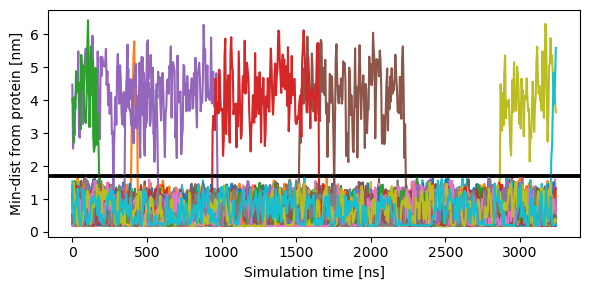

Average micelle size is  48.993836671802775


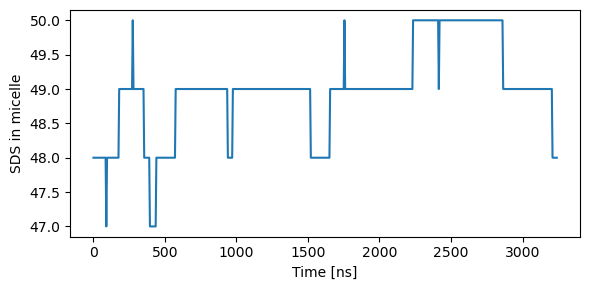

In [61]:
micelle=Micelle(f"mindist_{selection}.xvg")
average=50
micelle.runAnalysis(average)
micelle.plotAveraged(average,1.7,f"cutoff_{selection}.pdf")
micelle.plotInMicelle(average,f"{selection}_size.pdf")

In [26]:
def radgyr(atomgroup, masses, total_mass=None):
    # coordinates change for each frame
    coordinates = atomgroup.positions
    center_of_mass = atomgroup.center_of_mass()

    # get squared distance from center
    ri_sq = (coordinates-center_of_mass)**2
    # sum the unweighted positions
    sq = np.sum(ri_sq, axis=1)
    sq_x = np.sum(ri_sq[:,[1,2]], axis=1) # sum over y and z
    sq_y = np.sum(ri_sq[:,[0,2]], axis=1) # sum over x and z
    sq_z = np.sum(ri_sq[:,[0,1]], axis=1) # sum over x and y

    # make into array
    sq_rs = np.array([sq, sq_x, sq_y, sq_z])

    # weight positions
    rog_sq = np.sum(masses*sq_rs, axis=1)/total_mass
    # square root and return
    return np.sqrt(rog_sq)/10

def skip_traj(file,folder_path):
    path=folder_path+file+"/"
    
    readme=path+"README.yaml"
    with open(readme) as yaml_file:
        content = yaml.load(yaml_file, Loader=yaml.FullLoader)
        
    print("Gromacs trjconv running in the background, skip 10 --> save. freq. 1 ns ...")
    start = time.time()
    os.system("echo 'System'|gmx trjconv -f whole_"+ file+"_center_pbc_atom.xtc -s "+path+content["FILES_FOR_RELAXATION"]["tpr"]["NAME"] + " -o "+file+"_center_pbc_atom_skip.xtc  -pbc mol -skip 10 >/dev/null 2>&1")
    end = time.time()
    print("Trjconv took ",end - start," s")
    
def get_gyration(file,folder_path,micelle,average):
    skip_traj(file,folder_path)

    start = time.time()
    u = mda.Universe(file+".gro", file+"_center_pbc_atom_skip.xtc")
    end = time.time()
    print("Load of trajectory takes ",end - start," s")
    print("traj frames",len(u.trajectory))
    print("corresponding file", len(micelle.analysis[average][1]))
    
    print("their ratio",len(u.trajectory)/len(micelle.analysis[average][1]))
    sds=u.select_atoms('resname SDS ')


    start = time.time()
    radius=[]
    
    divide=len(u.trajectory)/len(micelle.analysis[average][1])*1000
    test_times=[]
    lipid_gone=[]
    for frame in u.trajectory:
        test_times.append(u.trajectory.ts.time)
        select="protein or "
        lipi=0
        for i,resid in enumerate(set(sds.resids)):
            if micelle.analysis[average][i+1][int(u.trajectory.ts.time//divide)]<micelle.cutoffs[average]:
                select+="resid "+str(resid)+" or "
                lipi+=1
                
            #else:
            #    print("resid ",resid, ", time ",u.trajectory.ts.time,int(u.trajectory.ts.time//divide)*int(average/1000*micelle.save_freq),micelle.analysis[average][i+1][int(u.trajectory.ts.time//divide)])
        
        lipid_gone.append(lipi)
                
        select=select[:-4]
        sdsIn=u.select_atoms(select)

        radius.append(radgyr(sdsIn, sdsIn.masses, total_mass=np.sum(sdsIn.masses))[0])
        
        
        #print(radgyr(sdsIn, sdsIn.masses, total_mass=np.sum(sdsIn.masses)))
        #print(u.trajectory.ts.time//5000)

    end = time.time()
    print("Calculation of radius of gyration takes ",end - start," s")
    print("Average radius is ",np.average(radius),"\n ")
    
    
    plt.rcParams["figure.figsize"] = [15.00, 7]
    plt.rcParams["figure.autolayout"] = True
    plt.rcParams.update({'font.size': 20})


    plt.plot(test_times,lipid_gone)
    
    
    micelle_size=[]
      
    for i in range(len(micelle.analysis[average][1])):
        number=0
        for j in range(1,micelle.sds+1):
            if micelle.analysis[average][j][i]<micelle.cutoffs[average]:
                number+=1
        micelle_size.append(number)
    
    x40=[*range(0,len(micelle.analysis[average][1])*int(divide),int(divide))]
    plt.plot(x40,micelle_size)

    plt.show()
    
    
    return radius

Gromacs trjconv running in the background, skip 10 --> save. freq. 1 ns ...
Trjconv took  6.431027412414551  s
Load of trajectory takes  0.08745145797729492  s
traj frames 3249
corresponding file 649
their ratio 5.006163328197227


/home/ricky/anaconda3/envs/all3/lib/python3.8/site-packages/MDAnalysis/topology/base.py:203: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  residx = np.zeros_like(criteria[0], dtype=np.int)
/home/ricky/anaconda3/envs/all3/lib/python3.8/site-packages/MDAnalysis/core/selection.py:521: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.

Calculation of radius of gyration takes  35.198601961135864  s
Average radius is  1.5629405995809185 
 


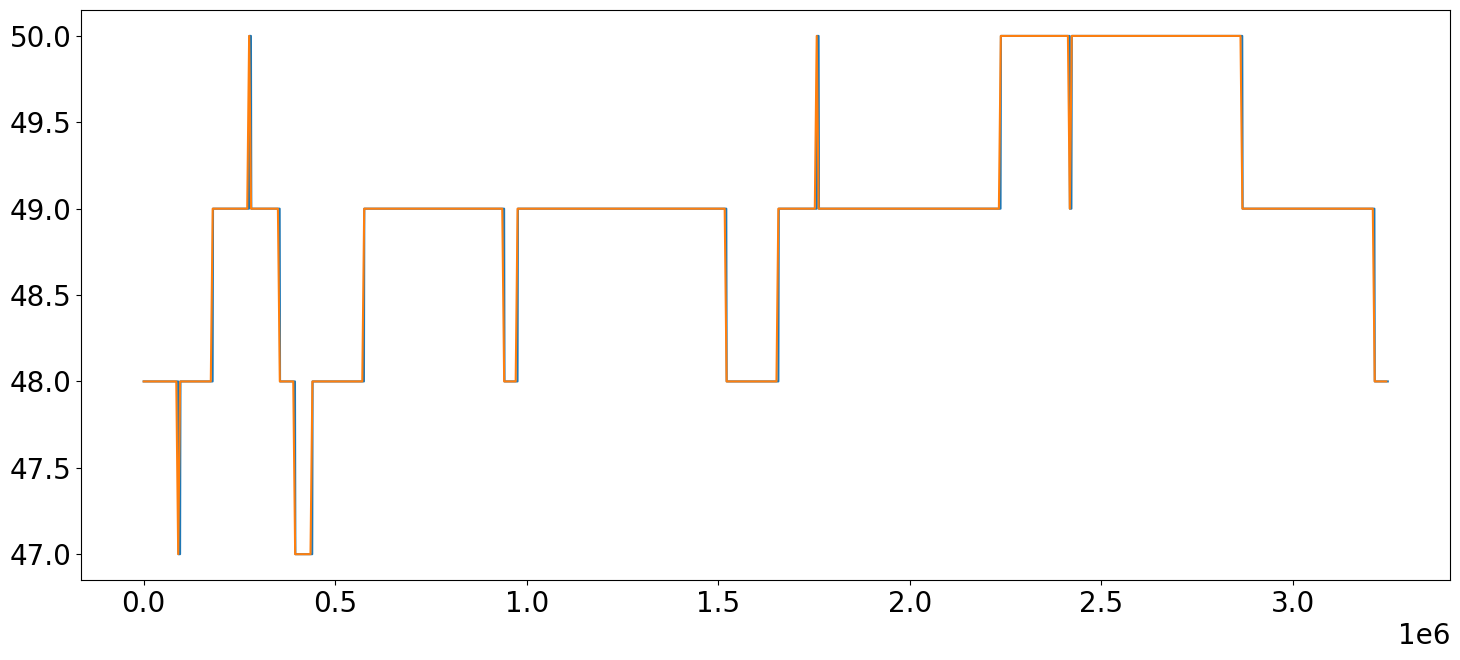

In [62]:
radius_micelle=get_gyration(selection,folder_path,micelle,average)